In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

'Background materials for interview.pdf'   requirements.txt
 chemical_reaction_model.ipynb		   TestDatabase.xlsx


In [4]:
df = pd.read_excel("TestDatabase.xlsx")
df.head()

,conti_Ca,conti_Cb,conti_Ca_in,conti_Tsp,conti_m_in,conti_mfree_A_liq,conti_mfree_B_liq,conti_mfree_A_gas,conti_mfree_B_gas,conti_Pinert,conti_P_A,conti_P_B,conti_Ptot
0,12.500000,0.000000,13.062965,357.047056,2.0,35000.000000,0.000000,3500.000000,0.000000,100000.0,8.658575e+06,0.000000,8.758575e+06
1,12.393228,0.107255,13.062965,357.047056,2.0,34701.037604,225.234700,3470.103760,22.523470,100000.0,8.584615e+06,74293.771118,8.758909e+06
2,12.287463,0.213502,13.062965,357.047056,2.0,34404.895408,448.353382,3440.489541,44.835338,100000.0,8.511353e+06,147889.572820,8.759243e+06
3,12.182695,0.318750,13.062965,NaN,2.0,34111.546805,669.376002,3411.154681,66.937600,100000.0,8.438782e+06,220793.987390,8.759576e+06
4,12.078916,0.423011,13.062965,NaN,2.0,33820.965450,888.322320,3382.096545,88.832232,100000.0,8.366896e+06,293013.532865,8.759909e+06


# **GOAL**: For the operator in charge of the process, it is important to understand how the concentrations of the products (conti_Ca & conti_Cb) in the outgoing flows evolve as a function of all other parameters. 
# model **conti_Ca_in** with the remaining parameters and predict **conti_Cb** and **conti_Ca** with a regression mode in two separate models

In [8]:
# Assuming your DataFrame is named 'df'
# Replace 'your_column_names' with the actual names of your columns

def custom_describe(df):
    summary_stats = pd.DataFrame(index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing'])

    for column in df.columns:
        column_stats = []

        # Count (including missing values)
        count_with_missing = len(df[column])
        column_stats.append(count_with_missing)

        # Mean
        mean = df[column].mean()
        column_stats.append(mean)

        # Standard Deviation
        std = df[column].std()
        column_stats.append(std)

        # Min
        min_value = df[column].min()
        column_stats.append(min_value)

        # Percentiles
        percentiles = df[column].describe(percentiles=[.25, .5, .75])
        column_stats.extend(percentiles.loc[['25%', '50%', '75%']])

        # Max
        max_value = df[column].max()
        column_stats.append(max_value)

        # Missing values
        missing_values = df[column].isnull().sum()
        column_stats.append(missing_values)

        summary_stats[column] = column_stats

    return summary_stats

# Use the custom_describe function
result = custom_describe(df)

# Display the result
result

,conti_Ca,conti_Cb,conti_Ca_in,conti_Tsp,conti_m_in,conti_mfree_A_liq,conti_mfree_B_liq,conti_mfree_A_gas,conti_mfree_B_gas,conti_Pinert,conti_P_A,conti_P_B,conti_Ptot
count,28814.000000,28814.000000,28814.000000,28814.000000,28814.000000,28814.000000,28814.000000,28814.000000,28814.000000,28814.000000,2.881400e+04,2.881400e+04,2.881400e+04
mean,1.922393,10.406138,12.316871,342.111382,1.998974,5360.959562,21893.577793,535.748079,2182.266352,95822.416647,1.178100e+06,6.990810e+06,8.281141e+06
std,1.787991,1.890978,1.465869,39.715066,0.045287,4945.897532,3930.220657,499.628285,398.065655,11108.186700,1.062159e+06,1.840688e+06,1.037761e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,6.137713e+06
25%,0.383703,9.325844,11.022312,310.289243,2.000000,1082.743302,19681.953990,99.455091,1954.156648,86904.299628,2.610664e+05,5.614513e+06,7.408385e+06
50%,1.432586,10.809126,12.263535,343.752171,2.000000,4027.579484,22693.026412,400.794092,2268.253785,97431.355818,9.124696e+05,6.983922e+06,8.341341e+06
75%,2.953676,11.746921,13.485383,379.700172,2.000000,8270.495996,24693.040264,829.688187,2467.542197,106344.574410,1.794184e+06,8.473851e+06,8.986956e+06
max,12.500000,13.687907,14.922942,407.278453,2.000000,35000.000000,28744.604631,3500.000000,2874.460463,114068.565048,8.658575e+06,1.066725e+07,1.086888e+07
missing,1056.000000,1916.000000,1975.000000,1820.000000,1522.000000,2059.000000,2217.000000,1704.000000,1355.000000,1544.000000,1.360000e+03,1.710000e+03,1.309000e+03


# Correlation matrix 

In [10]:
def pearson_correlation(X):
    data = X
    corr_pearson = data.corr(method='pearson')
    plt.subplots(figsize=(15,10))
    sns.heatmap(corr_pearson)
    # drop correlated feature
    # Return a new array of given shape and type, filled with fill_value.
    columns = np.full((corr_pearson.shape[0],), True, dtype=bool) 
    for i in range(corr_pearson.shape[0]):
        for j in range(i+1, corr_pearson.shape[0]):
            if corr_pearson.iloc[i,j] >= 0.75:
                if columns[j]:
                    columns[j] = False
    selected_columns_pearson = data.columns[columns]
    return selected_columns_pearson, corr_pearson

def spearman_correlation(X):
    data = X
    corr_spearman = data.corr(method='spearman')
    plt.subplots(figsize=(15,10))
    sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    # Returns a new array of given shape and type, filled with fill_value.
    columns = np.full((corr_spearman.shape[0],), True, dtype=bool) 
    for i in range(corr_spearman.shape[0]):
        for j in range(i+1, corr_spearman.shape[0]):
            if corr_spearman.iloc[i,j] >= 0.75:
                if columns[j]:
                    columns[j] = False
    selected_columns_spearman = data.columns[columns]
    return selected_columns_spearman, corr_spearman

NameError: name 'sns' is not defined

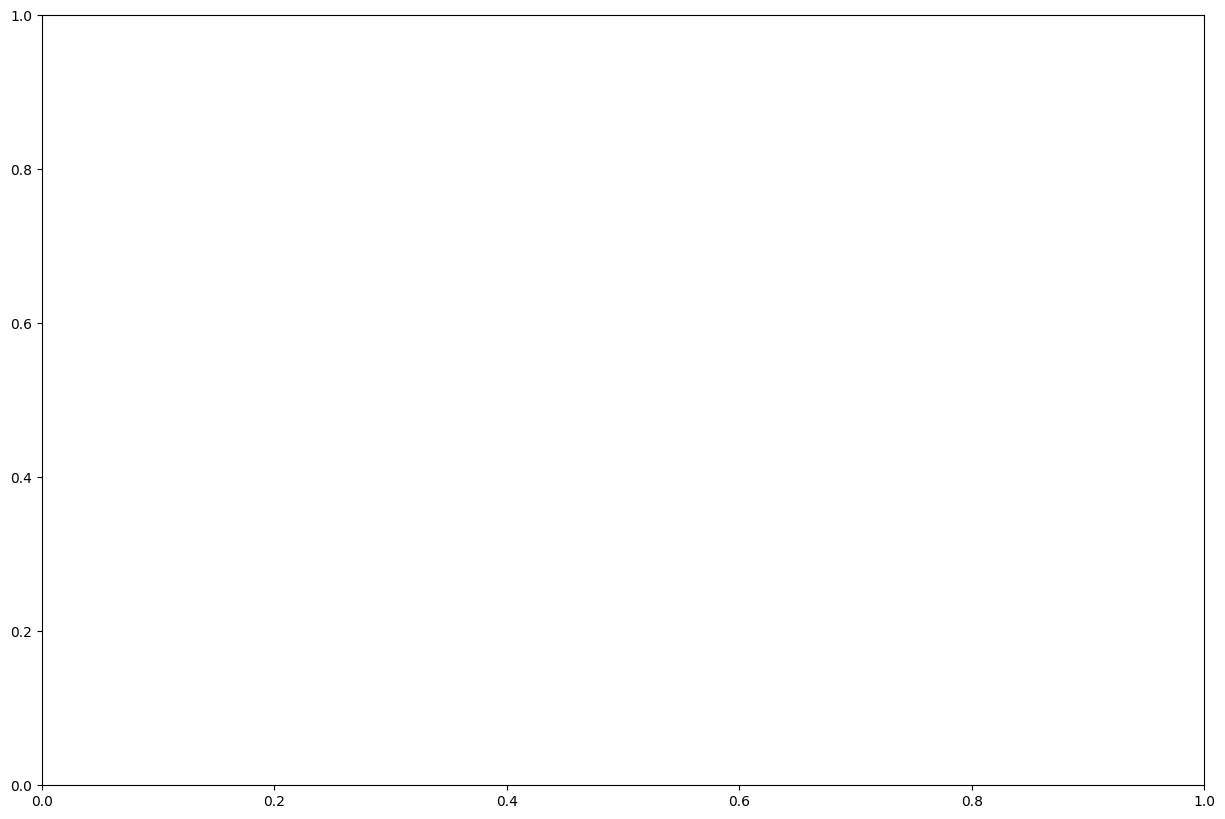

In [13]:
spearman_correlation(df)